# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 7 Мультиоконные рисунки

### Содержание главы

1. Методы создания мультиокон;

2. Близкое расположение областей рисования;

3. Автоматизированное создание мультиокон;

4. Мультиокна разных размеров. Gridspec;

5. "Главное - чтобы костюмчик сидел".

В прошлых главах мы рассмотривали в основном простые графики, где область рисования Axes была одна. В это параграфе мы поговорим о сложных рисунках, которые могут содержать не одну, а несколько областей рисования. Вместо слова "несколько" можно было бы употребить слово "много", но лучше никогда не рисовать много графиков на одном рисунке. 

**Золотое правило:** 

> Недопустимо, если не все части или элементы рисунка понятны или хорошо различаемы на фоне остальных. Рисунок должен быть читаемым, а не коробкой, в которую автор напихал от жадности (или жёстких требований журнала/издателя) всё, что смог создать. Нужно следовать python-заповеди (см. `import this`): "сложное лучше, чем запутанное". Как сделать так, чтобы запутанные рисунки стали сложными, сохранив при этом функциональность и привлекательный вид, показано в этой главе.

### Электронные ресурсы:

+ [Кракткий курс лекций по расширенным возможностям matplotlib с рассмотрением subplots и GridSpec](http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/12_AdvancedMatplotlib);

+ [Рецепты по работе с областями рисования из Сookbook/matplotlib](http://wiki.scipy.org/Cookbook/Matplotlib);

+ [Примеры работы с методом subplots_adjust()](http://matplotlib.org/examples/pylab_examples/subplots_adjust.html);

+ [Гид по tight_layout()](http://matplotlib.org/users/tight_layout_guide.html);

+ [Документация по Gridspec](http://matplotlib.org/api/gridspec_api.html?highlight=gridspec#module-matplotlib.gridspec);

+ [Примеры работы с Gridspec](http://matplotlib.org/users/gridspec.html).

### 7.1 Методы создания мультиокон

В matplotlib реализовано несколько спобов создания рисунков с несколькими областями для диаграмм (multi-panel plots):

1. **`fig.add_axes()`** - базовый метод, удобен при создании диаграммы-врезки;

2. **`fig.add_subplot()`** - добавление одного subplot на рисунок. Удобно для отображения 2-3 диаграмм;

3. **`plt.subplot()`** - аналогичный предыдущему по результату метод для pyplot;

4. **`plt.subplots()`** - удобный метод для автоматизированного создания нескольких subplots;

5. **`plt.GridSpec()`** - метод для объединения ячеек subplots в более сложные конфигурации. Позволяет создавать разные по форме subplots на рисунке.

Первые два метода (с приставкой `add_`) являются более низкоуровнемыми, и для их вызова требуется объект Figure. Последние три метода реализованы в pyplot интерфейсе. Каждый из этих методов создаёт один или более экземпляров типа subplot (в примерах будет приведён точный тип этого объекта) или axes. Каждый такой объект - отдельная область рисования и к ней применимы все те приёмы, которые мы рассмотрели в предыдущей главе, когда работали с экземпляром-объектом типа axes. Хотя метод `fig.add_axes` создаёт объект типа Axes, а все остальные - типа AxesSubplot, то есть разные типы объектов, они являются родственными, и работать с ними можно одними и теми же методами.

Самым простым способом разбить, то есть поделить, рисунок на несколько частей является способ `fig.add_subplot()`. Смысл создания subplots состоит в том, что они наполняют рисунок ячейками (как в таблице) в каждой из которой теперь можно создавать свой собственный график или диаграмму (или карту-схему). 

Метод `fig.add_subplot()` всегда имеет три обязательных аргумента: число ячеек по вертикали (число строк), число ячеек по горизонтали (число столбцов) и номер ячейки (отсчёт ведётся от 1 слева направо, сверху вниз). Три числа перечисленные через запятую (3,2,5) или триплет в виде одного числа (325), переданные методу fig.add_subplot(), создают экземпляр (instance) "`matplotlib.axes._subplots.AxesSubplot`", что является подвидом более широкого класса "`matplotlib.axes`".

`fig.add_subplot()` оптимален, когда необходимо быстро изобразить несколько (обычно 2-3) графиков-диаграмм рядом. Желательно при этом, чтобы они не перекрывались, за исключением случаев, когда области рисунка "слипаются" и образуют общие границы (как по оси абсцисс, так и по оси ординат).

Область 1 Axes(0.125,0.547727;0.775x0.352273)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Область 2 Axes(0.125,0.125;0.775x0.352273)


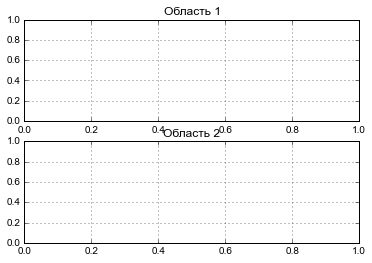

In [2]:
# Пример 7.1.1 Создание двух областей на рисунке с помощью fig.add_subplot()

import matplotlib.pyplot as plt

fig = plt.figure()

tri = 211
ax1 = fig.add_subplot(tri)
ax1.set_title(u'Область 1')
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title(u'Область 2')

# Узнаём координаты областей, которые занимают subplots
print u'Область 1', ax1
print type(ax1)
print u'Область 2',ax2

# Нарисуем в каждом subplot линию сетки
for ax in fig.axes:
    ax.grid(True)
    
save('pic_7_1_1', fmt='png')
save('pic_7_1_1', fmt='pdf')
    
plt.show()

Аналогичного результата можно добиться и "в лоб", то есть самостоятельно задать границы нужных областей. Для прямого выделения положения областей на рисунке нужно использовать метод `fig.add_axes()`. На рисунке в относительных координатах (от 0 до 1) можно задать несколько (сколько угодно) областей, на каждой из которых можно будет рисовать графики и диаграммы (не забываем про карты и изображения-фотографии). Каждая область задаётся отдельно и требует указать параметры границы в виде списка [левая, нижняя, ширина, высота]. Стоит отметить, что этот метод позволяет задать многие важные настройки создаваемой области рисования и в частности тип области рисования (если параметр `polar=True` или `projection='polar'`, то область рисования будет не прямоугольной, а круговой).

Область 1 Axes(0.125,0.547727;0.775x0.352273)
<class 'matplotlib.axes._axes.Axes'>
Область 2 Axes(0.125,0.125;0.775x0.352273)


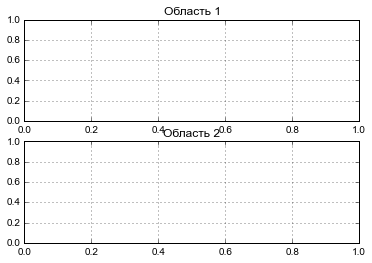

In [3]:
# Пример 7.1.2

import matplotlib.pyplot as plt

fig = plt.figure()

# В примере для задания границ областей была использована информация
# о границах subplots из предыдущего примера

ax1 = fig.add_axes([0.125, 0.547727, 0.775, 0.352273]) 
ax1.set_title(u'Область 1')
ax2 = fig.add_axes([0.125, 0.125, 0.775, 0.352273]) 
ax2.set_title(u'Область 2')

# Узнаём координаты областей, которые занимают subplots
print u'Область 1', ax1
print type(ax1)
print u'Область 2',ax2

# Нарисуем в каждом subplot линию сетки
for ax in fig.axes:
    ax.grid(True)
    
save('pic_7_1_2', fmt='png')
save('pic_7_1_2', fmt='pdf')
    
plt.show()

В примерах области ax1 - это экземпляры разных классов:
   
> ax1 axes -> `matplotlib.axes._axes.Axes`

> ax1 subplots -> `matplotlib.axes._subplots.AxesSubplot`

Если вы хотите изменить размер и размещение экземпляра subplot после того, как он был создан, то можно использовать метод `ax.set_position()`.

> Пример: `ax.set_position([0.1,0.1, 0.5, 0.5])`.

### 7.2 Близкое расположение областей рисования

Если создавать области рисования с помощью метода `fig.add_axes()`, то созданные области, которые имеют общее место на рисунке, будут перекрывать друг друга. Так как в matplotlib используется идеология рисования текущей области ("current axis"), то последнее нарисованное изображение одного уровня (области, линии и т.д.) будет перекрывать предыдущие.

Вновь создавамая область рисования типа subplot вписывается в рисунок в границах, определяемых соответствующими параметрами rcParams:

> `rcParams['figure.subplot.left'] = 0.125`    # левая граница

> `rcParams['figure.subplot.right'] = 0.9`    # правая граница

> `rcParams['figure.subplot.bottom'] = 0.125`  # нижняя граница

> `rcParams['figure.subplot.top'] = 0.9`    # верхняя граница

При использования методов `fig.add_subplot()` или `plt.subplots()` по умолчанию оставляется некоторое свободное пространство между создаваемыми областями. Изменяя размер этих "буферов" с помощью соответствующих параметров настройки rcParams, можно добиться эффекта соединения или склейки.

> `rcParams['figure.subplot.hspace'] = 0.2 `  # определяет совокупное вертикальное расстояние между subplots

> `rcParams['figure.subplot.wspace'] = 0.2`   # определяет совокупное горизонтальное расстояние между subplots

Для аналогичной настройки можно воспользоваться методом pyplot `plt.tight_layout()`. Данный метод позволяет "навести красоту" одной строчкой. Часто это очень экономит время от "вылизывания" пустяковых графиков до приличного вида. Метод имеет четыре параметра:

+ **pad** - расстояние между краями рисунка Figure и краями subplots, выраженное в виде доли fontsize (см. rcParams['font.size']) 

+ **h_pad** - совокупное расстояние по вертикали между subplots. По умолчанию имеет значения pad_inches (rcParams['savefig.pad_inches'])

+ **w_pad** - расстояние по горизонтали между краями соседних subplots. По умолчанию имеет значения pad_inches (rcParams['savefig.pad_inches'])

+ **rect** - если задан, то это прямоугольник (левый, низ, правый, верх) в относительных координатах figure, в который будут вписаны все области subplots (включая подписи). По умолчанию (0, 0, 1, 1).

В совокупности нижние четыре параметра - это те же самые параметры, которые используются в качестве входящих для параметра rect в методе `plt.tight_layout()`. Данным методом можно определять взаимное (не но отдельное) положение subplots и сдвигать их, как отдаляя их друг от друга, так и сближая (отрицательные значения h_pad и w_pad).

Область 1 Axes(0.125,0.547727;0.775x0.352273)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Область 2 Axes(0.125,0.125;0.775x0.352273)


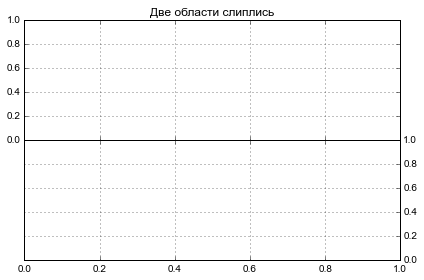

In [4]:
# Пример 7.2.1

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.set_title(u'Две области слиплись')
ax2 = fig.add_subplot(212)

# Чтобы подписи осей координатных сеток не сливались разнесём их
# в разные стороны - одну оставим слева, а другую вынесем направо
ax1.tick_params(axis='x', labelbottom='off', labeltop='off') 
ax2.tick_params(axis='y', labelleft='off', labelright='on', left=False, right=True)
# Узнаём координаты областей, которые занимают subplots
print u'Область 1', ax1
print type(ax1)
print u'Область 2',ax2

# Нарисуем в каждом subplot линию сетки

for ax in fig.axes:
    ax.grid(True)

# Параметр подобран эмпирически, на глаз. Это скверно

plt.tight_layout(h_pad = -0.88)

save('pic_7_2_1', fmt='png')
save('pic_7_2_1', fmt='pdf')

plt.show()

В примере ниже область ax2 создана позже, чем ax1. Значит именно ax2 будет перекрывать область ax1. Если поменять местами ax1 и ax2 (строчки кода, где они создаются, а не где на этих областях рисуются линии), то область с голубой линией будет перекрыта и мы её вообще не увидим.

Область 1 Axes(0,0;1x1)
<class 'matplotlib.axes._axes.Axes'>
Область 2 Axes(0.5,0.5;0.5x0.5)


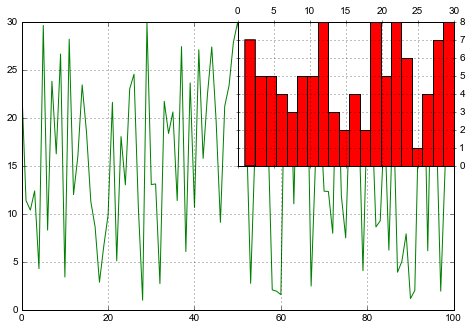

In [5]:
# Пример 7.2.2

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

N = 100
x = np.arange(N)
y = np.random.random(N)*30.

# Область ax1 нарисуется первой
ax1 = fig.add_axes([0.,0.,1.0,1.0]) 
# Область ax2 перекроет область ax1 и закроет её часть
ax2 = fig.add_axes([0.5,0.5,0.5,0.5])

rect0 = [0.0, 0.0]

ax1.plot(rect0, 'r')
ax1.plot(x, y, 'green')

ax2.plot(rect0, 'c')
ax2.hist(y, 20, edgecolor='k', facecolor='r')
ax2.tick_params(axis='y', which='major', direction='inout',
                left=True, right=True, labelleft=False, labelright=True)
ax2.tick_params(axis='x', which='major', direction='inout',
                bottom=True, top=True, labelbottom=False, labeltop=True)

print u'Область 1', ax1
print type(ax1)
print u'Область 2',ax2

for ax in fig.axes:
    ax.grid(True)
    
save('pic_7_2_2', fmt='png')
save('pic_7_2_2', fmt='pdf')

plt.show()

### 7.3 Автоматизированное создание мультиокон

Для создания множества областей удобно не просто добавлять их на рисунок последовательно, по одному, а всего одной строчкой разбить рисунок на несколько областей рисования. Это позволяет сделать, например, метод `plt.subplots()`, который требует указать число строк и столбцов создаваемой таблицы каждая из ячеек которой и есть объект-экземпляр subplots. Метод возвращает объект типа figure и массив из созданных subplots. Их можно перебрать в цикле "в лоб", но лучше пользоваться перебором из списка fig.axes, куда автоматически добавляются все области рисования текущего рисунка fig. 

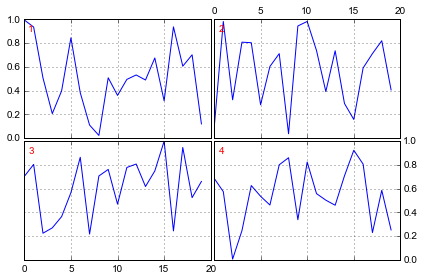

In [6]:
# Пример 7.3

import numpy as np
import matplotlib.pyplot as plt

fig, subplots = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

x = np.arange(20)

i = -1
for ax in fig.axes:
    i += 1
    y = np.random.rand(np.size(x))
    ax.grid(True)
    ax.text(0.5, 0.9, str(i+1), color='red')
    ax.plot(x, y)
    if((i+1)%2 == 0):
        ax.tick_params(axis='y', labelleft='off', labelright='on', left=False, right=True)
    if((i==0) or (i==1)):
        ax.tick_params(axis='x', labelbottom='off', labeltop='off', left=False, right=True)     
    if((i==1) or (i==2)):
        ax.tick_params(axis='y', labelleft='off', labelright='off', left=False, right=False)
    if(i==3):
        ax.tick_params(axis='x', labelbottom='off', labeltop='off')        
    if(i==1):
        ax.tick_params(axis='x', labelbottom='off', labeltop='on')
    if(i==0):
        ax.tick_params(axis='y', left=True, right=False)

# Параметры подобраны эмпирически, на глаз
plt.tight_layout(h_pad = -0.15, w_pad = -0.2)

save('pic_7_3', fmt='png')
save('pic_7_3', fmt='pdf')

plt.show()

### 7.4 Мультиокна разных размеров. Gridspec

Методы `fig.add_subplot()` и `plt.subplots()` позволяют разбить рисунок на равные по размерам области и в этом состоит одно из их основных преимуществ. Оъединить ячейки subplots в более сложные конструкции позволяет метод `plt.subplot2grid()`, который также именуется как метод Gridspec.

Этот метод позволяет настроить индивидуальные размеры создаваемых subplots. Основной принцип метода - объединения ячеек в более длинные или высокие плитки-области. Таким образом, экземпляры subplots могут быть разных форм и размеров.

Создание ячеек осуществляется при помощи метода `subplot2grid()`, которому необходимо задать число строк и столбцов в виде кортежа, а также расположение ячеек в виде кортежа номеров от 0 до максимального числа ячеек N-1. То есть для создания таблицы 2x2 нужно задать размер (2,2) и расположение в пределах от (0,0) до (1,1).

<class 'matplotlib.axes._subplots.AxesSubplot'>


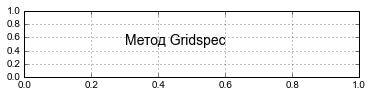

In [7]:
# Пример 7.4.1

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 3,3 - три столбца и три ячейки

ax = plt.subplot2grid((3, 1), (0, 0))

print type(ax)

# это запись эквивалентна более детальной записи

gs = gridspec.GridSpec(3, 1)

ax = plt.subplot(gs[0, 0])
ax.grid(True)
# Положение текста задано в относительных координатах
ax.text(0.3, 0.5, u'Метод Gridspec', fontsize=14, transform=ax.transAxes)

save('pic_7_4_1', fmt='png')
save('pic_7_4_1', fmt='pdf')

plt.show()

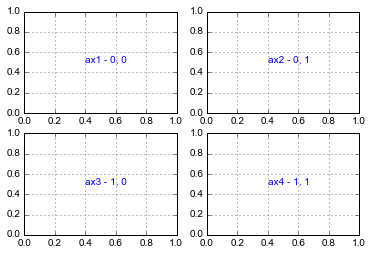

In [8]:
# Пример 7.4.2 Создание нескольких областей. Пример задания сетки-таблицы (grid) и расположения (loc)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure()

ax1 = plt.subplot2grid((2,2), (0, 0))
ax2 = plt.subplot2grid((2,2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1, 0))
ax4 = plt.subplot2grid((2,2), (1, 1))

i = -1
jj = [0, 0, 1, 1]
kk = [0, 1, 0, 1]
for ax in fig.axes:
    i += 1
    stext = 'ax%d - %d, %d' % (i+1, jj[i], kk[i])
    ax.text(0.4, 0.5, stext, color='b')
    ax.grid(True)
    
save('pic_7_4_1', fmt='png')
save('pic_7_4_1', fmt='pdf')

plt.show()

Главным преимуществом данного метода является то, что получаемые subplots могут быть разных форм и размеров. При этом конфигурация задаётся в виде объединения ячеек, а не через указание явных границ, как это можно было бы сделать с помощью метода `ax.add_axes()`.

Для объединения ячеек при создании таблицы-сетки нужно добавить следующие параметры в метод subplot2grid:

* **colspan** - объединить столбы;

* **rowspan** - объединить строки.

Значение соответствующих параметров показывает сколько ячеек сетки объединить. Причём отсчёт ведётся от точки локализации ячейки включая её. Если нужно объединить и столбцы и строки, то указываются оба параметра одновременно.

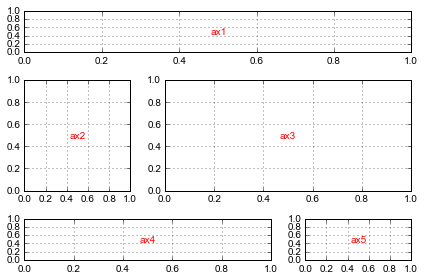

In [9]:
# Пример 7.4.3

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure()

# Сетка состоит из 4 строк и 3 столбцов. Первая ячейка имеет номер (0,0),
# а последняя - (3,2)
egrid = (4,3)
ax1 = plt.subplot2grid(egrid, (0, 0), colspan=3)
ax2 = plt.subplot2grid(egrid, (1, 0), rowspan=2)
ax3 = plt.subplot2grid(egrid, (1, 1), rowspan=2, colspan=2)
ax4 = plt.subplot2grid(egrid, (3, 0), colspan=2)
ax5 = plt.subplot2grid(egrid, (3, 2))

for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center", 
                color='red', transform=ax.transAxes)
        ax.grid(True)

# Настройка расстояний между границами созданных subplots
plt.tight_layout()

save('pic_7_4_3', fmt='png')
save('pic_7_4_3', fmt='pdf')

plt.show()

### 7.5 "Главное - чтобы костюмчик сидел!"

Создание мультиоконных рисунков - это всегда компромис между удобством представления информации (всё в одном месте) и читаемостью самого рисунка. Перегрузить рисунок используя вышеперечисленные методы проще простого, если общее число ячеек превысило число 4. Поэтому злоупотреблять мультиокнами не нужно. Разместить несколько графиков на рисунке - пожалуйста! Но если на каждой из 4 областей будет по 3-4 графика, то это уже перебор. Учитесь выделять главное, то, что вы точно хотите показать, что выгодно и беспроигрышно подтверждает ваши тезисы.

Немаловажным является также ясность подписей. При создании рисунка со множеством диаграмм подписи к осям становятся либо нечитаемыми, либо выглядят неопрятно. На слайде или лекции это куда ни шло, но в научный журнал такое не пошлёшь! Нужно следить за читаемостью легенд и размещать их так, чтобы они не мешали чтение рисунка. При этом не нужно дублировать информацию. Если графики расположены один под одним и у них единая шкала по оси абсцисс, то на некоторых областях можно убрать подписи оставив вспомогательную сетку.

Одним словом нужно уметь двигать созданные тем или иным способом области, если подписи к ним или к осям вылазят или перекрываются. Самым простым является метод **`plt.tight_layout()`**. Он самостоятельно подбирает параметры рисунка так, чтобы все объекты на нём выглядели хорошо. К сожалению, он плохо ладит одновременно с методом `fig.add_axes()`.

Метод **`fig.subplots_adjust()`** позволяет обновить SubplotParams (по умолчанию определяет их из rcParams, если ни один аргумент метода не был определён) и переопределить параметры местоположения subplots. Также можно напрямую определять параметры расположения subplots через **`matplotlib.rcParams`**.

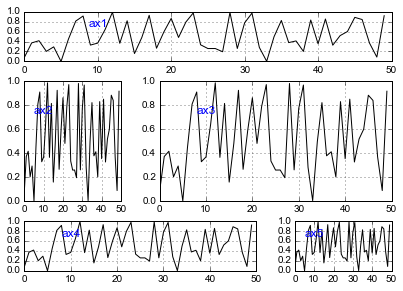

In [10]:
# Пример 7.5

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rcParams

# Левая граница subplots на рисунке
rcParams['figure.subplot.left'] = 0.1
# Правая граница subplots на рисунке
rcParams['figure.subplot.right'] = 0.95
# Нижняя граница subplots на рисунке
rcParams['figure.subplot.bottom'] = 0.05
# Верхняя граница subplots на рисунке
rcParams['figure.subplot.top'] = 0.95

# Изменение параметров wspace и hspace методом rcParams

# Общая высота (вертикаль), выделенная для свободного пространства между subplots
rcParams['figure.subplot.hspace'] = 0.2
# Общая ширина (горизонталь), выделенная для свободного пространства между subplots
rcParams['figure.subplot.wspace'] = 0.2

N = 50
x = np.arange(N)
y = np.random.rand(np.size(x))

fig = plt.figure()

# Сетка состоит из 4 строк и 3 столбцов. Первая ячейка имеет номер (0,0),
# а последняя - (3,2)
egrid = (4,3)
ax1 = plt.subplot2grid(egrid, (0, 0), colspan=3)
ax2 = plt.subplot2grid(egrid, (1, 0), rowspan=2)
ax3 = plt.subplot2grid(egrid, (1, 1), rowspan=2, colspan=2)
ax4 = plt.subplot2grid(egrid, (3, 0), colspan=2)
ax5 = plt.subplot2grid(egrid, (3, 2))

for i, ax in enumerate(fig.axes):
        ax.plot(x, y, 'k')
        ax.text(0.2, 0.75, "ax%d" % (i+1), va="center", ha="center", 
                color='blue', transform=ax.transAxes, fontsize='large')
        ax.grid(True)

# Изменение параметров wspace и hspace методом fig.subplots_adjust()
fig.subplots_adjust(wspace=0.4, hspace=0.4)

save('pic_7_5', fmt='png')
save('pic_7_5', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

> + [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)